In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import t
from scipy.stats import norm

In [2]:
def t_score(population_mean, sample_mean, sample_size, sample_std):
  numerator = population_mean - sample_mean
  denominator = sample_std / (sample_size ** 0.5)
  return numerator / denominator

#Question 1
Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?

Step 1 (Decide Null and Alternate Hypothesis) $\implies$

$$ Null \ Hypothesis(Status \ Quo) : H_0 \ \implies \ \mu=500 \ gm $$
$$ Alternate \ Hypothesis(Bold \ Claim) : H_1 \ \implies \ \mu \neq \ 500gm $$

Step 2 (Collect samples to compute test statistics) $\implies$

$$ Samples(x) = [450, 600, 290, 350, 550] $$
$$ n = 5 $$

Step 3 (Compute test statistics on the sample collected) $\implies$
$$ \mu_\bar{x} = \frac{\sum_{i=0}^{n-1} x_i}{n} = 448 \ gm $$
$$ x \implies Samples $$

$$ S^2 = \frac{\sum_{i=0}^{n-1} (x_i - \mu_x)^2}{n} = 13616$$

Z Score here can't be calculated due to absense of population standard deviation, so we will calculate t score.
$$ t \ score = \frac{\mu_x - \mu_\bar{x}}{S/\sqrt{n}} = 0.996 $$

Step 4(Decide significance level) $\implies$
$$ Confidence = 95\% $$
$$ 1 - \alpha = 0.95 $$
$$ \alpha = 0.05 $$

Step 5.1 (Apply decision Rule using t score)  $\implies$
 1. In case of 2 tailed $\implies$ $$ |t| > t_{{n - 1}, {\frac{\alpha}{2}} } \implies Reject \ H_0, \ Accept \ H_1 $$
 2. In case of right tailed $\implies$ $$ t > t_{{n-1}, {\alpha}} \implies Reject \ H_0, \ Accept \ H_1 $$ 
 3. In case of left tailed  $\implies$ $$ t < t_{{n-1}, \alpha} \implies Reject \ H_0, \ Accept \ H_1 $$

Here we will use two tailed test $\implies$ $$ |t| < t_{4, 0.025} \\ 0.996 < 2.776 \\ We \ Reject \ H_1 $$

Step 5.2 (Apply decision Rule using p score)$\implies$
1. For 2 tailed test $\implies$ $$ p \ value = 2 * (1 - cdf(test \ statistic)) $$
2. For one tailed test $\implies$ $$ p \ value = (1 - cdf(test \ statistic)) $$

$$ if (p \ values < \alpha) \implies Reject \ H_0, \ Accept \ H_1 $$
$$  where \ cdf \ is \ Cumulative \ distribution \ function \ of \ t \ score $$

Here we use two tailed test $\implies$ $$ p \ value = 2 * (1 - cdf(0.996)) \\ p \ value = 0.319 \\ p \ value > \alpha \\ We \ Reject \ H_1 $$

In [3]:
l = [450, 600, 290, 350, 550]
sample_mean = sum(l) / len(l)
print(sample_mean)

448.0


In [4]:
s = 0
for i in l:
  s+=pow((i - sample_mean), 2)
sample_variance = s / len(l)
print(sample_variance)

13616.0


In [5]:
sample_std = sample_variance ** 0.5
print(sample_std)

116.68761716651858


In [6]:
population_mean = 500
sample_size = len(l)

In [7]:
t_calculated = t_score(population_mean, sample_mean, sample_size, sample_std)
print(t_calculated) 

0.9964684998585458


In [8]:
alpha = 1 - 0.95
print(round(alpha, 2))

0.05


In [9]:
#Two tail test
t_critical = t.ppf(1-alpha/2, df=4)
print(t_critical)

2.7764451051977987


In [10]:
if abs(t_calculated) < t_critical:
  print("Accept Null Hypothesis")
else:
  print("Reject Null Hypothesis") 

Accept Null Hypothesis


In [11]:
#Two tail test
p_val = 2 * (1-norm.cdf(abs(t_calculated)))
print(p_val)

0.3190225648886287


In [12]:
if (p_val > alpha):
  print("We accept Null Hypothesis")
else:
  print("We reject Null Hypothesis")

We accept Null Hypothesis


Text(448.0, 0.0007, 'X_bar')

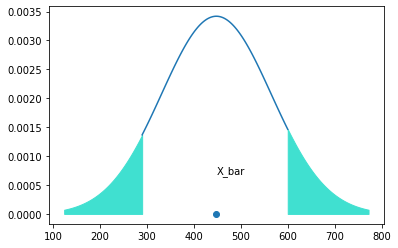

In [13]:
x_min = min(l)
x_max = max(l)
mean = sample_mean
std = sample_std

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)

t_critical_left = mean + (-1 * t_critical * std)
t_critical_right = mean + (t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color="turquoise")

x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color="turquoise")

plt.scatter(mean, 0)
plt.annotate("X_bar", (mean, 0.0007))

#Question 2
You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?

Step 1 (Decide Null and Alternate Hypothesis) $\implies$

$$ Null \ Hypothesis(Status \ Quo) : H_0 \ \implies \ \mu \leq 4 $$
$$ Alternate \ Hypothesis(Bold \ Claim) : H_1 \ \implies \ \mu  >  4 $$

Step 2 (Collect samples to compute test statistics) $\implies$

$$ Samples(x) = [4.1, 3.2, 5, 3.5, 4.9] $$
$$ n = 5 $$

Step 3 (Compute test statistics on the sample collected) $\implies$
$$ \mu_\bar{x} = \frac{\sum_{i=0}^{n-1} x_i}{n} = 4.14 $$
$$ x \implies Samples $$

$$ S^2 = \frac{\sum_{i=0}^{n-1} (x_i - \mu_x)^2}{n} = 0.522 $$

Z Score here can't be calculated due to absense of population standard deviation, so we will calculate t score.
$$ t \ score = \frac{\mu_x - \mu_\bar{x}}{S/\sqrt{n}} = -0.433 $$

Step 4(Decide significance level) $\implies$
$$ Confidence = 95\% $$
$$ 1 - \alpha = 0.95 $$
$$ \alpha = 0.05 $$

Step 5.1 (Apply decision Rule using t score)  $\implies$
 1. In case of 2 tailed $\implies$ $$ |t| > t_{{n - 1}, {\frac{\alpha}{2}} } \implies Reject \ H_0, \ Accept \ H_1 $$
 2. In case of right tailed $\implies$ $$ t > t_{{n-1}, {\alpha}} \implies Reject \ H_0, \ Accept \ H_1 $$ 
 3. In case of left tailed  $\implies$ $$ t < t_{{n-1}, \alpha} \implies Reject \ H_0, \ Accept \ H_1 $$

Here we will use two tailed test $\implies$ $$ |t| < t_{4, 0.05} \\ 0.433 < 2.132 \\ We \ Reject \ H_1 $$

Step 5.2 (Apply decision Rule using p score)$\implies$
1. For 2 tailed test $\implies$ $$ p \ value = 2 * (1 - cdf(test \ statistic)) $$
2. For one tailed test $\implies$ $$ p \ value = (1 - cdf(test \ statistic)) $$

$$ if (p \ values < \alpha) \implies Reject \ H_0, \ Accept \ H_1 $$
$$  where \ cdf \ is \ Cumulative \ distribution \ function \ of \ t \ score $$

Here we use two tailed test $\implies$ $$ p \ value = (1 - cdf(0.433)) \\ p \ value = 0.332 \\ p \ value > \alpha \\ We \ Reject \ H_1 $$

In [14]:
l = [4.1, 3.2, 5, 3.5, 4.9]
sample_mean = sum(l) / len(l)
print(sample_mean)

4.140000000000001


In [15]:
s = 0
for i in l:
  s+=pow((i - sample_mean), 2)
sample_variance = s / len(l)
print(sample_variance)

0.5224


In [16]:
sample_std = sample_variance ** 0.5
print(sample_std)

0.7227724399837061


In [17]:
population_mean = 4
sample_size = len(l)

In [18]:
t_calculated = t_score(population_mean, sample_mean, sample_size, sample_std)
print(t_calculated) 

-0.43312320660293735


In [19]:
alpha = 1 - 0.95
print(round(alpha, 2))

0.05


In [20]:
#One tail test
t_critical = t.ppf(1-alpha, df=4)
print(t_critical)

2.13184678133629


In [21]:
if abs(t_calculated) < t_critical:
  print("Accept Null Hypothesis")
else:
  print("Reject Null Hypothesis") 

Accept Null Hypothesis


In [22]:
#One tail test
p_val = (1-norm.cdf(abs(t_calculated)))
print(p_val)

0.3324626321609707


In [23]:
if (p_val > alpha):
  print("We accept Null Hypothesis")
else:
  print("We reject Null Hypothesis")

We accept Null Hypothesis


Text(4.140000000000001, 0.0007, 'X_bar')

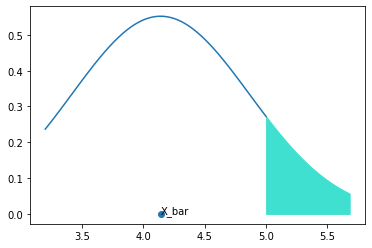

In [24]:
x_min = min(l)
x_max = max(l)
mean = sample_mean
std = sample_std

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)

t_critical_right = mean + (t_critical * std)

x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color="turquoise")

plt.scatter(mean, 0)
plt.annotate("X_bar", (mean, 0.0007))

#Question 3
TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?



Step 1 (Decide Null and Alternate Hypothesis) $\implies$

$$ Null \ Hypothesis(Status \ Quo) : H_0 \ \implies \ \mu \leq 15 \ km/litre $$
$$ Alternate \ Hypothesis(Bold \ Claim) : H_1 \ \implies \ \mu  >  15 \ km/litre $$

Step 2 (Collect samples to compute test statistics) $\implies$

$$ Samples(x) = [14.2, 13.9, 15.8, 13.5, 17.9, 12.5, 16.2, 15.9, 11.0, 19.5] $$
$$ n = 10 $$

Step 3 (Compute test statistics on the sample collected) $\implies$
$$ \mu_\bar{x} = \frac{\sum_{i=0}^{n-1} x_i}{n} = 15.04 $$
$$ x \implies Samples $$

$$ S^2 = \frac{\sum_{i=0}^{n-1} (x_i - \mu_x)^2}{n} = 5.788 $$

Z Score here can't be calculated due to absense of population standard deviation, so we will calculate t score.
$$ t \ score = \frac{\mu_x - \mu_\bar{x}}{S/\sqrt{n}} = -0.052 $$

Step 4(Decide significance level) $\implies$
$$ Confidence = 90\% $$
$$ 1 - \alpha = 0.90 $$
$$ \alpha = 0.10 $$

Step 5.1 (Apply decision Rule using t score)  $\implies$
 1. In case of 2 tailed $\implies$ $$ |t| > t_{{n - 1}, {\frac{\alpha}{2}} } \implies Reject \ H_0, \ Accept \ H_1 $$
 2. In case of right tailed $\implies$ $$ t > t_{{n-1}, {\alpha}} \implies Reject \ H_0, \ Accept \ H_1 $$ 
 3. In case of left tailed  $\implies$ $$ t < t_{{n-1}, \alpha} \implies Reject \ H_0, \ Accept \ H_1 $$

Here we will use two tailed test $\implies$ $$ |t| < t_{9, 0.10} \\ 0.05 < 1.383 \\ We \ Reject \ H_1 $$

Step 5.2 (Apply decision Rule using p score)$\implies$
1. For 2 tailed test $\implies$ $$ p \ value = 2 * (1 - cdf(test \ statistic)) $$
2. For one tailed test $\implies$ $$ p \ value = (1 - cdf(test \ statistic)) $$

$$ if (p \ values < \alpha) \implies Reject \ H_0, \ Accept \ H_1 $$

Here we use two tailed test $\implies$ $$ p \ value = (1 - cdf(0.05)) \\ p \ value = 0.479 \\ p \ value > \alpha \\ We \ Reject \ H_1 $$

In [25]:
l = [14.2, 13.9, 15.8, 13.5, 17.9, 12.5, 16.2, 15.9, 11.0, 19.5]
sample_mean = sum(l) / len(l)
print(sample_mean)

15.040000000000003


In [26]:
s = 0
for i in l:
  s+=pow((i - sample_mean), 2)
sample_variance = s / len(l)
print(sample_variance)

5.788399999999999


In [27]:
sample_std = sample_variance ** 0.5
print(sample_std)

2.405909391477576


In [28]:
population_mean = 15
sample_size = len(l)

In [29]:
t_calculated = t_score(population_mean, sample_mean, sample_size, sample_std)
print(t_calculated) 

-0.05257517463243281


In [30]:
alpha = 1 - 0.95
print(round(alpha, 2))

0.05


In [31]:
#One tail test
t_critical = t.ppf(1-alpha, df=4)
print(t_critical)

2.13184678133629


In [32]:
if abs(t_calculated) < t_critical:
  print("Accept Null Hypothesis")
else:
  print("Reject Null Hypothesis") 

Accept Null Hypothesis


In [33]:
#One tail test
p_val = (1-norm.cdf(abs(t_calculated)))
print(p_val)

0.479035198689981


In [34]:
if (p_val > alpha):
  print("We accept Null Hypothesis")
else:
  print("We reject Null Hypothesis")

We accept Null Hypothesis


Text(15.040000000000003, 0.0007, 'X_bar')

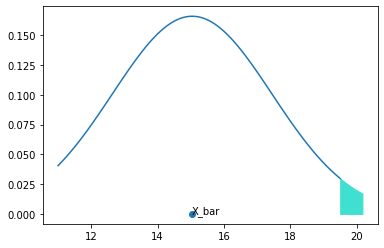

In [35]:
x_min = min(l)
x_max = max(l)
mean = sample_mean
std = sample_std

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)

t_critical_right = mean + (t_critical * std)

x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color="turquoise")

plt.scatter(mean, 0)
plt.annotate("X_bar", (mean, 0.0007))

#Question 4
You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?

Step 1 (Decide Null and Alternate Hypothesis) $\implies$

$$ Null \ Hypothesis(Status \ Quo) : H_0 \ \implies \ \mu \geq 100 \ ms $$
$$ Alternate \ Hypothesis(Bold \ Claim) : H_1 \ \implies \ \mu  <  100 \ ms $$

Step 2 (Collect samples to compute test statistics) $\implies$

$$ Samples(x) = [99, 89, 104, 110, 120, 87, 92, 103, 108, 86] $$
$$ n = 10 $$

Step 3 (Compute test statistics on the sample collected) $\implies$
$$ \mu_\bar{x} = \frac{\sum_{i=0}^{n-1} x_i}{n} = 99.8 $$
$$ x \implies Samples $$

$$ S^2 = \frac{\sum_{i=0}^{n-1} (x_i - \mu_x)^2}{n} = 113.96 $$

Z Score here can't be calculated due to absense of population standard deviation, so we will calculate t score.
$$ t \ score = \frac{\mu_x - \mu_\bar{x}}{S/\sqrt{n}} = 0.059 $$

Step 4(Decide significance level) $\implies$
$$ Confidence = 95\% $$
$$ 1 - \alpha = 0.95 $$
$$ \alpha = 0.05 $$

Step 5.1 (Apply decision Rule using t score)  $\implies$
 1. In case of 2 tailed $\implies$ $$ |t| > t_{{n - 1}, {\frac{\alpha}{2}} } \implies Reject \ H_0, \ Accept \ H_1 $$
 2. In case of right tailed $\implies$ $$ t > t_{{n-1}, {\alpha}} \implies Reject \ H_0, \ Accept \ H_1 $$ 
 3. In case of left tailed  $\implies$ $$ t < t_{{n-1}, \alpha} \implies Reject \ H_0, \ Accept \ H_1 $$

Here we will use two tailed test $\implies$ $$ |t| < t_{9, 0.05} \\ 0.059 < 1.833 \\ We \ Reject \ H_1 $$

Step 5.2 (Apply decision Rule using p score)$\implies$
1. For 2 tailed test $\implies$ $$ p \ value = 2 * (1 - cdf(test \ statistic)) $$
2. For one tailed test $\implies$ $$ p \ value = (1 - cdf(test \ statistic)) $$

$$ if (p \ values < \alpha) \implies Reject \ H_0, \ Accept \ H_1 $$

Here we use two tailed test $\implies$ $$ p \ value = (1 - 0.523) \\ p \ value = 0.477 \\ p \ value > \alpha \\ We \ Reject \ H_1 $$

In [36]:
l = [99, 89, 104, 110, 120, 87, 92, 103, 108, 86]
sample_mean = sum(l) / len(l)
print(sample_mean)

99.8


In [37]:
s = 0
for i in l:
  s+=pow((i - sample_mean), 2)
sample_variance = s / len(l)
print(sample_variance)

113.96


In [38]:
sample_std = sample_variance ** 0.5
print(sample_std)

10.675204916066013


In [39]:
population_mean = 100
sample_size = len(l)

In [40]:
t_calculated = t_score(population_mean, sample_mean, sample_size, sample_std)
print(t_calculated) 

0.059245282597044056


In [41]:
alpha = 1 - 0.95
print(round(alpha, 2))

0.05


In [42]:
#One tail test
t_critical = t.ppf(1-alpha, df=4)
print(t_critical)

2.13184678133629


In [43]:
if abs(t_calculated) < t_critical:
  print("Accept Null Hypothesis")
else:
  print("Reject Null Hypothesis") 

Accept Null Hypothesis


In [44]:
#One tail test
p_val = (1-norm.cdf(abs(t_calculated)))
print(p_val)

0.47637837133194716


In [45]:
if (p_val > alpha):
  print("We accept Null Hypothesis")
else:
  print("We reject Null Hypothesis")

We accept Null Hypothesis


Text(99.8, 0.0007, 'X_bar')

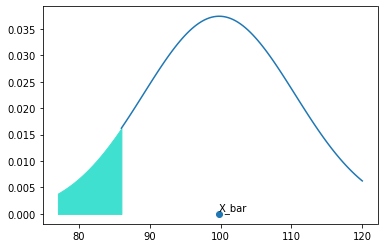

In [46]:
x_min = min(l)
x_max = max(l)
mean = sample_mean
std = sample_std

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)

t_critical_left = mean + (-1 * t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color="turquoise")

plt.scatter(mean, 0)
plt.annotate("X_bar", (mean, 0.0007))